In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import numpy as np

#config
from config import config

In [2]:
# Obtain the configuration parameters
params = config()
# Connect to the PostgreSQL database
conn = psycopg2.connect(**params)
# Create a new cursor
cur = conn.cursor()

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table
  
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
salary_info = create_pandas_table("""SELECT employees.emp_no, salaries.salary, titles.title 
                                  FROM employees
                                  LEFT JOIN titles ON employees.emp_no = titles.emp_no
                                  LEFT JOIN salaries ON employees.emp_no = salaries.emp_no;""")

# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()

In [3]:
salary_info

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10005,78228,Senior Staff
2,10005,78228,Staff
3,10010,72488,Engineer
4,10011,42365,Staff
...,...,...,...
443303,499972,41002,Senior Engineer
443304,499985,40000,Staff
443305,499987,52282,Staff
443306,499998,40000,Senior Staff


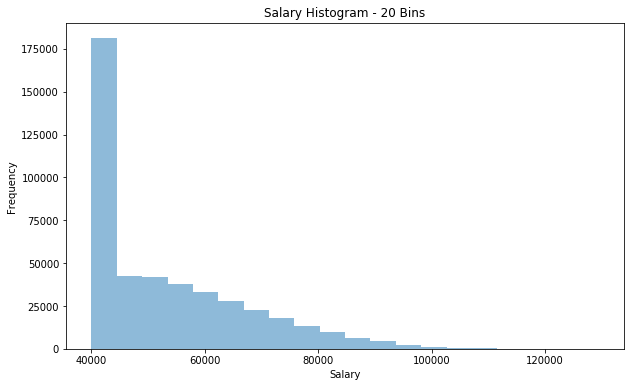

In [4]:
# 2. Create a histogram to visualize the most common salary ranges for employees.
plt.figure(figsize = (10,6))
plt.title("Salary Histogram - 20 Bins")
plt.xlabel('Salary')
ax2 = salary_info["salary"].plot.hist(bins=20, alpha = 0.5)
plt.savefig("Salary Histogram.png")

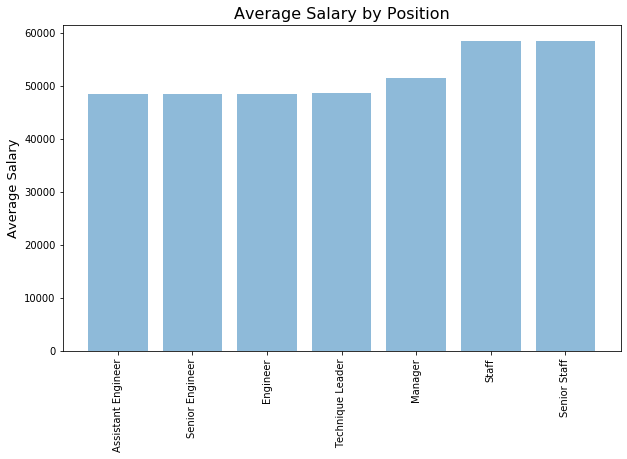

In [5]:
# 3. Create a bar chart of average salary by title.
avg_salary = salary_info.groupby(['title'])['salary'].mean()
df_salary = pd.DataFrame({"avg salary": avg_salary})
df_salary = df_salary.reset_index().sort_values('avg salary', ascending = True)

fig, ax = plt.subplots(figsize = (10,6))
rects = ax.bar(df_salary["title"], df_salary["avg salary"], alpha = .5)

ax.set_ylabel('Average Salary', fontsize = 13)
ax.set_title('Average Salary by Position', fontsize = 16)
ax.set_xticks(df_salary["title"])
plt.xticks(rotation = 90)
plt.savefig("Average Salary by Position.png")